# Image Recognition using PyTorch July 5th 2022

In this notebook we will be using  [PyTorch Ecosystem](https://pytorch.org/ecosystem/ "Click to visit the PyTorch Ecosystem homepage") to build a simple image classifier using CNNs.   

Pytorch has become the most popular deep learning library surpassing Tensor Flow. 


 

In [ ]:
# Some useful commands
#print(transform.__doc__) # tells you what a function (in this case transform) does

!nvidia-smi # Use this command to figure out the GPU assigned by Google 

Sat Jul  2 14:08:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import libraries
import torch # PyTorch 
import torchvision
from torchvision import datasets # Datasets module 
import torchvision.transforms as transforms # Image Transforms 
from torch.utils.data.sampler import SubsetRandomSampler # Sampler 
import numpy as np
import pandas as pd
import torchvision.models as models
import random

### 1. Download the Data
We will use the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database "Wikipedia to the rescue!").  


_"The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image._  


<br/> PyTorch comes with a _datasets_ module called, [Torchvision.Datasets](https://pytorch.org/docs/stable/torchvision/datasets.html "Official Documentation").  Torchvision.Datasets module contains a number of publically available datasets including the one we are looking for, MNIST.

#### Tensors  
Tensors are the building blocks of every deep learning library including   
PyTorch. What are tensors though?  

![Tensors](https://drive.google.com/uc?id=1F5cLclu4RML7zj7axf8IGU7aUXJlI7N0 "Udacity Deep Learning Nano Degree")  

Creating tensors in PyTorch is easy  
```

```

In [ ]:
data_ex = [[1, 2],[3, 4]]
print(data_ex)
x_data = torch.tensor(data_ex)
print(x_data)

[[1, 2], [3, 4]]
tensor([[1, 2],
        [3, 4]])


In [ ]:
torch.FloatTensor([[20, 30, 40], [90, 60, 70]])

tensor([[20., 30., 40.],
        [90., 60., 70.]])

In [ ]:
x = torch.rand(3, 3)
print(x)

tensor([[0.2043, 0.2339, 0.2086],
        [0.1205, 0.6041, 0.4252],
        [0.2373, 0.3480, 0.5194]])


In [ ]:
# Convert imagedata to torch.FloatTensor
# Images in this cases are 28x28 array of pixel values.
# Transform converts this into one tensor which is
transform = transforms.ToTensor()

# Choose the training and test datasets
train_data = datasets.MNIST(root = 'data', train = True, download = True,transform = transform)
test_data = datasets.MNIST(root ='data', train= False, download =True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Another way to write the same code above more compactly


In [ ]:
#train_data = datasets.MNIST(root = 'data', train = True, download = True,transform = transforms.Compose([transforms.ToTesnor()]))
#test_data = datasets.MNIST(root ='data', train= False, download =True, transform = transforms.Compose([transforms.ToTesnor()]))

#transforms.Compose can allow you to customize your data with many argument: changing its size, centering it etc.

#transforms.Compose([
#       transforms.RandomResizedCrop(224),
#       transforms.RandomHorizontalFlip(),
#       transforms.ToTensor(),
#       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

### 2. Organizing the data
#### Split data into training, validation and test sample 

Once the download is complete (usually instantaneous), you should be able to  
see the MNIST dataset downloaded inside the _'data'_ folder on the left hand  
side. (Click on the _Files_ icon on the left sidebar)  

We have both the training and the test sets. Now we need to bifurcate the   
training set in two parts,  
1. Training Set (80% images)
2. Validation Set (20% images)  

The algorithm we use to do this is quite simple,  
1. Create a list of indices of the training data 
2. Randomly Shuffle those indices 
3. Slice the indices in 80-20 split 


In [ ]:
# Obtain training indices that will be used for validation

# 1. Create a list of indices of the training data  
num_train = len(train_data)
print('num_train', num_train)
indices =list(range(num_train))
print(len(indices))

num_train 60000
60000


In [ ]:
# 2. Randomly Shuffle those indices

np.random.shuffle(indices)

In [ ]:
# 3. Slice the indices in 80-20 split
# percentage of training set to use as validation

valid_size = 0.2 # ie Train Set divided into two parts 
                 # 80% Train 20% Validation 
split =int(np.floor(valid_size*num_train)) # The floor of the scalar x is the largest integer i, such that i <= x.
print(split)
train_idx, valid_idx = indices[split:], indices[:split]
print(len(train_idx))
print(len(valid_idx))
print(type(train_idx))
print(random.sample(train_idx,10))
print(random.sample(valid_idx, 10))

12000
48000
12000
<class 'list'>
[10403, 53157, 13347, 30552, 50092, 25665, 47844, 4501, 49718, 30764]
[5840, 5022, 8007, 24908, 26551, 36728, 50946, 14794, 10849, 2315]


So far we have manipulated the indices.

### 3. Prepare the Dataloaders 

In [ ]:
# Define samplers for obtaining training and validation batches
# Remember train_idx and valid_idx were the indices that we shuffled above
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Prepare dataloaders
# Number of subprocesses to use for data loading
num_workers = 0 # Do not modify 
# How many samples per batch to load
batch_size = 20 # Number of samples (batches)

# Training Set 
train_loader = torch.utils.data.DataLoader(dataset=train_data, \
                                           batch_size=batch_size, \
                                           sampler=train_sampler, \
                                           num_workers=num_workers)
# Validation Set 
# Sampler changes to validation sample indices
valid_loader = torch.utils.data.DataLoader(dataset=train_data, \
                                           batch_size=batch_size, \
                                           sampler=valid_sampler, \
                                           num_workers=num_workers)
# Test Set 
# Notice we have not used a 'sampler' here as it was not required 
test_loader = torch.utils.data.DataLoader(dataset=test_data, \
                                           batch_size=batch_size, \
                                           num_workers=num_workers)

In [ ]:
train_sampler = SubsetRandomSampler(train_idx)
print(type(train_sampler))
print(len(train_sampler))

<class 'torch.utils.data.sampler.SubsetRandomSampler'>
48000


In [ ]:
train_loader

In [ ]:
# Another way to do the same as above
#train_loader = torch.utils.data.DataLoader(dataset=train_data, \
#                                           batch_size=batch_size, \
#                                           shuffle =true)
#train_loader = torch.utils.data.DataLoader(dataset=valid_data, \
#                                           batch_size=batch_size, \
#                                           shuffle =true)

In [ ]:
print(len(test_loader)) #500 (=1000/20) batches with 20 images in each batch
print(len(valid_loader)) #600 (=12000/20) batches with 20 images in each batch
print(len(train_loader)) #2400 (= (48000/20) batches with 20 images in each batch

500
600
2400


In [ ]:
# Visualize what's in the training data batch
# instead of printing all 2400 tensor representations
# use break to see the first 20 tensors

for data in train_loader:
  print(data[0])
  break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
# See labels
for data in train_loader:
  print(data[1])
  break

tensor([6, 2, 2, 9, 4, 9, 3, 8, 0, 0, 0, 0, 7, 2, 9, 7, 8, 6, 2, 8])


In [ ]:
print(type(data))
len(data)
len(data[1])
print(data[0][4]) # gives the column and row values of each of the 282X28 tensor of 4th image
print(data[1][4]) # gives the value of label associated with the 4th image

<class 'list'>
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# Visualize a whole batch of data from the dataloaders 

dataiter =iter(train_loader)
print(type(dataiter))
images, labels = dataiter.next()

print(len(images), len(labels)) # Should be equal to the batch size, 20
print(labels)
print('Correct Labels: ', labels)
images = images.numpy() # Convert the images to numpy array for matplotlib
print('Shape of our image batch =', images.shape)
print('Batch Size =', images.shape[0], 'Image Height/Width =', \
                                                        images.shape[2])

print()
print('Squeezing the images tensor =', np.squeeze(images).shape)
print('Un-squeezing the images tensor (axis=3) =', \
                                        np.expand_dims(images, axis=3).shape)

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
20 20
tensor([8, 4, 2, 9, 8, 8, 3, 3, 0, 2, 8, 6, 2, 9, 6, 6, 2, 8, 2, 6])
Correct Labels:  tensor([8, 4, 2, 9, 8, 8, 3, 3, 0, 2, 8, 6, 2, 9, 6, 6, 2, 8, 2, 6])
Shape of our image batch = (20, 1, 28, 28)
Batch Size = 20 Image Height/Width = 28

Squeezing the images tensor = (20, 28, 28)
Un-squeezing the images tensor (axis=3) = (20, 1, 28, 1, 28)


torch.Size([1, 28, 28])


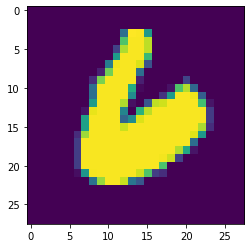

In [ ]:
import matplotlib.pyplot as plt 
# Plots are plotted inside the notebooks, 'inline'
%matplotlib inline 

# Plots first image
# Need to use ".view" to re-shape 1X28X28 tensor into 28X28 array
# otherwise get error
plt.imshow(data[0][0].view(28,28))

# .shape lets you see the third dimension- the channel which is '1' for grayscale images
print(data[0][0].shape)

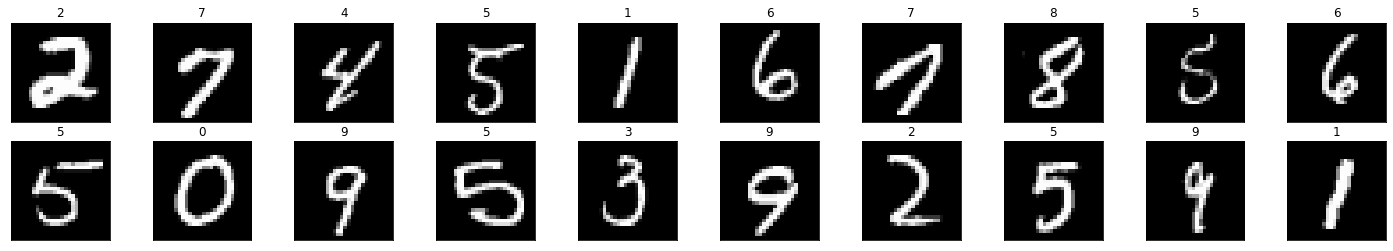

In [ ]:
# Plot the whole batch 
fig = plt.figure(figsize=(25, 4))
# Loop over all the images in the batch(20)
for idx in np.arange(20):
    # Add a subplot for the image 
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    # Populate the subplot with the image 
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [ ]:
# A neat little numpy trick
# Just for fun! 

dataiter = iter(train_loader)  
images, labels = dataiter.next() 
images = images.numpy() 
print(images[0])
np.set_printoptions(precision=2, threshold=None, edgeitems=None, \
                    linewidth=180, suppress=None)
print('Label', labels[0])
print(images[0])

Label tensor(1)
[[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.89 0.22 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.15 0.92 0.71 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.56 0.99 0.76 0.   0.   0.   0.   0.   0.

### 4. Define PyTorch CNN Model
Components of a CNN based image classification architecture.  


#### 4.1.2 Basic CNN Layer  
So how does a CNN layer actually _'works'_?  

![CNN Scan](https://drive.google.com/uc?id=1JictobCPmaIX_9pm2mQewc4QiAzl0pzO "Remember Billie Eilish above?")  

<br/>A colored image has 3 channels,  
![RGB Image](https://drive.google.com/uc?id=1QlU04TZ6IN2IRqQJFB8m6GFJ2MmqYGhz "https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53")  

<br/>A 3-channel convolution,  
![RGB Convolution](https://drive.google.com/uc?id=1CGIqxGHjJGXr8aduPtwGd1-ikgA3WqJ5 "https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215")  

![RGB Convolution Summation](https://drive.google.com/uc?id=1fpM3NLvyjeiKF6_at0Nv4XhYPRkwH1IY "https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215")

#### 4.1.3 Stride  
_'Stride'_ of the kernel while scanning the image.  

Here's an example with _stride=1_,  
![CNN Stride = 1](https://drive.google.com/uc?id=1wJd7VCYfiMDes0Ex0SlBL97yBP6P7ajt "https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53")  

<br/>Another example with _stride=2_,  
![CNN Stride = 2](https://drive.google.com/uc?id=1dG2i4WtxUzu9Wlsl3jyH4ZXxUSYVdKfk)

#### 4.1.4 Padding  
Padding ensures that there is no loss of information while an image with a  
convolutional kernel.  
![Padding = 1](https://drive.google.com/uc?id=1xIQSJVRtAS7em_E387ZBd6sErjwA7RD6 "https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53")

#### 4.1.5 Max Pooling  
Max Pooling layer primarily reduces the dimensionality of the input.  

![Max Pooling](https://drive.google.com/uc?id=11_1ThNaU4e4DAEFs7I9GsNoD7oFmtVES "https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53")  

Max Pooling is not the only type of pooling layer out there.  
![Type of Pooling](https://drive.google.com/uc?id=1ECZrE8vAhTE1gEsp_3vPy03oLuSj0aOW)  


In [ ]:
import torch.nn as nn # nn module contains all the layers 
import torch.nn.functional as F 

In [ ]:
# Basic NN with only linear layers and no convolutional layers
class Net1(nn.Module):
    # Here we define the neural architecture 
    def __init__(self):
        super(Net1, self).__init__() # Initialize the nn module
        self.fc1=nn.Linear(28*28, 64) # fully connected layer that takes flattened 28 X28 as input and outputs 64 neuron layer
        self.fc2=nn.Linear(64, 64)
        self.fc3=nn.Linear(64, 64)
        self.fc4=nn.Linear(64, 10)

# Forward behavior:pushing images/data from the start of the network and
# generating an output (and a loss/error)
# This is where you actaully connect the layers together and
# make everything work.
    def forward(self,x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = self.fc4(x)
      return F.log_softmax(x, dim=1)

net = Net1()
print(net)

Net1(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand(28,28)
X =  X.view(-1,28*28)
print(X)

In [ ]:
output=net(X)
output

In [ ]:
output
# gives logit values (need to be exponentiated) for 0,1,2....10.
# grad_fn mean gradient function

tensor([[-2.1594, -2.2534, -2.2969, -2.3625, -2.2768, -2.3326, -2.2680, -2.4105,
         -2.3599, -2.3286]], grad_fn=<LogSoftmaxBackward>)

Before we start,  
1. What is the shape (dimensions) of our images?  
2. What is the size of our batch? 
3. How many _'channels'_ are there in our images?  

![Batch Visualization](https://drive.google.com/uc?id=193KFtV2hr-7VkhQUJxd36oCF6Ms12xwD "Batch Visualization")

In [ ]:
# Our CNN based neural architecture
# Let's build a simple one with only Convolutional, Linear 
# and dropout layers
class MNISTModel1(nn.Module):
    # Here we define the neural architecture 
    def __init__(self):
        super(MNISTModel1, self).__init__() # Initialize the nn module 
        
        # Convolutional Layers
        # What shape/dimensions the first layer is going to see? 
        # 20 X 1 X 28 X28
        # Do we need to have some padding for a kernel_size = 3?  
        # Input Features = 1 x 28 x 28
        # Output Features = ???
        # Shape of a Convolutional Layer = (W - K + 2P)
        #                                  ------------ + 1
        #                                       S
        # where, 
        #       W = Width/Height of previous layer = 28
        #       K = Filter Size = 3
        #       P = Padding = 0
        #       S = Stride = 1(default)
        # Therefore, 
        #           if padding = 0
        #           Output Shape = ((28 - 3 + 2*0)/1)+1 = 26 
        # We want the dimensions to stay the same so that there is no 
        # loss of information when performing the convolution. 
        # Hence, 
        #       if padding = 1
        #       Output Shape = ((28 - 3 + 2*1)/1)+1 = 28
        # Add two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=8, kernel_size=3, \
                             stride=1, padding=1) #  output will be 8X28X28
        self.conv2= nn.Conv2d(in_channels=8,out_channels=16, kernel_size=3, \
                             stride=1, padding=1) #  output will be 16X28X28

        # Linear Layers 
        # What shape  is the first linear layer is going see?
        # What are the total number of features given out by conv2?
        # Features = 16 x 28 x 28 = 12544
        # Therefore,           
        self.linear1 = nn.Linear(in_features =12544, out_features = 256)
         # Add two more linear layers
        self.linear2 = nn.Linear(in_features =256, out_features = 64)
        # Last linear layer should output 10 features as we are 
        # Classifying the images in 10 categories 
        self.linear3 = nn.Linear(in_features =64, out_features = 10)

        # Dropout to avoid overfitting: Instructs what percentage of weights to be dropped
        self.dropout = nn.Dropout(p=0.25)

        

    # Here we define the forward behavior i.e. connecting the layers
    def forward(self, image_batch):
        # This is also the place where we add ACTIVATION functions 
        # Activation function is ReLU
        image_batch = F.relu(input = self.conv1(image_batch))
        image_batch = F.relu(input = self.conv2(image_batch))

   # Notice the differences in the inputs of conv and linear layers
        # Remember that when passing image_batch through the Linear layers, 
        # PyTorch expects tesors for conv layers and features for linear layers
        # >>> torch.Size([12, 256]) -> example values 
            # 2d: [batch_size, num_features (aka: C * H * W)]
            # use for nn.Linear() input.   
        # Therefore, we need to 'flatten' image_batch
        # image_batch = image_batch.view(batch_size, -1) --> batch size ???
        # You supply your batch_size as the first number, and then “-1” 
        # tells Pytorch, “you figure out this other number for me… please.” 
        # Your tensor will now feed properly into any linear layer.
        flat_image_batch = image_batch.view(image_batch.shape[0],-1)
        flat_image_batch = F.relu(input = self.linear1(flat_image_batch))

        # Let's add the dropout too 
        flat_image_batch = self.dropout(F.relu(input = self.linear2(flat_image_batch)))

        # Final Layer of the network 
        flat_image_batch = F.relu(input = self.linear3(flat_image_batch))

        # The output from the final layer is a tensor with 10 'logits'
        return flat_image_batch               

In [ ]:
# Let's install torchsummary and do some cool stuff 
!pip install torchsummary # https://github.com/sksq96/pytorch-summary 

In [ ]:
from torchsummary import summary 

In [ ]:
# We can make the use of torchsummary library here to figure 
# if we have done something wrong 

# But first we need to tell PyTorch where to 'keep' the model 
# On GPU or on CPU 
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
print('The model will run on', device)

# Initialize the model 
mnist1 = MNISTModel1().to(device)
summary(model =mnist1, input_size=(1,28,28),batch_size =20)

The model will run on cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [20, 8, 28, 28]              80
            Conv2d-2           [20, 16, 28, 28]           1,168
            Linear-3                  [20, 256]       3,211,520
            Linear-4                   [20, 64]          16,448
           Dropout-5                   [20, 64]               0
            Linear-6                   [20, 10]             650
Total params: 3,229,866
Trainable params: 3,229,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.06
Forward/backward pass size (MB): 2.93
Params size (MB): 12.32
Estimated Total Size (MB): 15.31
----------------------------------------------------------------


Easier way to define a model with _**[torchlayers library !!!](https://github.com/szymonmaszke/torchlayers "The best thing to have happened to PyTorch in recent times, shame it won't run on Colab!")**_  
With torchlayers, the above code will be reduced to about 7-8 lines!  
But unfortunately, [torchlayers requires Python 3.7](https://github.com/szymonmaszke/torchlayers/issues/5 "I tried my best!") and above. Colab only  
supports Python 3.6.x.  




### 5. Train a PyTorch Model 
We have defined our model by specifying its architecture.

Now we learn the weights and biases by optimizing the loss function. 
This involves specifying the loss function and and optimizing it using autograd module and optim module (requires specifying parameters such as learning rate).



#### 5.1 A training loop without more recent modules

In [ ]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss() # loss function
optimizer = optim.SGD(net.parameters(), lr=0.001) # initializes weights and sets step size for gradient descent.

for epoch in range(3):  # loop over the dataset 3 times   
    for data in train_loader:
        # get the inputs i.e. batch of features, X and batch of labels,y 
        X,y = data

        # zero the parameter gradients
        # otherwise these gradients will add up 
        # on every pass, and then we'll be re-optimizing for
        # previous gradients that we already optimized for. 
        optimizer.zero_grad()

        # forward + backward + optimize
        output = net(X.view(-1,784)) ## 784 = 28*28
        loss = loss_function(output, y)
        loss.backward() # apply loss backwards through networks parameters
        optimizer.step() # adjust weights to reduce loss
print(loss)

tensor(2.2760, grad_fn=<NllLossBackward0>)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        X,y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.304


#### 5.2  Simplify training loop with  _**[Poutyne](https://poutyne.org/index.html "How do you pronounce this?")**_ 


PS - Poutyne is pronounced as Poutine or Pu-tin.  


In [ ]:
# Install Poutyne 
!pip install poutyne 

In [ ]:
from poutyne.framework import Model # The core datastructure of poutyne 
                                    # https://poutyne.org/model.html

In [ ]:
from torch import optim 

In [ ]:
# A pouytne training loop

# A few hyperparamters for the training loop 
learning_rate = 0.1
epochs = 3

def poutyne_train(pytorch_model):
    
    optimizer = optim.SGD(pytorch_model.parameters(), lr = learning_rate)
    loss_function = nn.CrossEntropyLoss()

    model = Model(pytorch_model,optimizer,loss_function, \
                  batch_metrics=['accuracy'])
    model.to(device)
    # This will train the model
    model.fit_generator(train_loader, valid_loader,epochs=epochs)

    test_loss, test_acc = model.evaluate_generator(test_loader)
    
    print(f'Test:\n\tLoss: {test_loss: .3f}\n\tAccuracy: {test_acc: .3f}')

    return None

In [ ]:
# Let's start the training. 
poutyne_train(mnist1)

_**CONGRATULATIONS !!! You just trained your first(?) CNN Model!**_   
The accuracy looks pretty decent as well! 


### 6. Avoiding Overfitting 
Before we move any further we need to understand the concept of _**Overfitting**_  
in Machine Learning models.  
What is _**overfitting?**_  
![Fitting Examples](https://drive.google.com/uc?id=1gFOa5I24S7XDDep4WaVMIoivh9JvIp1Y "https://www.curiousily.com/posts/hackers-guide-to-fixing-underfitting-and-overfitting-models/")

We are always looking to ensure that our models have a low bias with a low  
variance.  
However, if we train for too long (too many epochs) our model will start to  
overfit.  

How do we identify that the model has started overfitting?  
![Overfitting](https://drive.google.com/uc?id=1q02q0ge0jldHJm8P_Hq6ECeIvaSlcc36 "https://mlexplained.com/2018/04/24/overfitting-isnt-simple-overfitting-re-explained-with-priors-biases-and-no-free-lunch/")  
Dotted vertical line is where we should either stop training the model (also  
known as _**Early Stopping**_) or we should have some logic in the training  
loop that _'saves'_ the model around that time while the training still  
continues. 

Our model will also overfit if it is too complex.  
For example (y-axis is different),  
![Complex Model](https://drive.google.com/uc?id=1vWHgknPrbXEQczdKMliB0RyVgYld3cGa "https://medium.com/@george.drakos62/cross-validation-70289113a072")  

<br/>Early stopping can save the day!  
![alt text](https://drive.google.com/uc?id=1HnBFMWZGHy0UFMUICKU25qBiB-4_G0Xn "https://www.jeremyjordan.me/deep-neural-networks-preventing-overfitting/")

A really nice matrix to identify if we are overfitting:  
![Overfitting Matrix](https://drive.google.com/uc?id=19bFHepjNgQ9kpqmQdMEW4lDJ-qXi5WF8 "https://hackernoon.com/memorizing-is-not-learning-6-tricks-to-prevent-overfitting-in-machine-learning-820b091dc42")  
Since we have a  validation set as well, replace the word _**'Testing'**_ with  
_**'Validation'**_. 

How can we avoid _**Overfitting**_?  
1. Use a simpler model (less layers)  
2. Use _Dropout_ 
3. Get more training data (if possible) 
4. Augment the data and add noise  
5. Early Stopping  



<br/>Can we write a better training loop now? 

In [ ]:
from poutyne.framework import ModelCheckpoint # Saves trained model during training
                                              # https://poutyne.org/callbacks.html#checkpointing
from poutyne.framework import EarlyStopping # You know what it does!
                                            # https://poutyne.org/callbacks.html#poutyne.framework.callbacks.EarlyStopping

### 7. Training loop to detect overfitting


 [LiveLossPlot !!!](https://github.com/stared/livelossplot "Click to visit Github Repository") simplifies visualizing model performance.

LiveLossPlot and Poutyne are compatible with each  
other! 

In [ ]:
!pip install livelossplot 

In [ ]:
from livelossplot import PlotLossesPoutyne # This module talks with Poutyne

In [ ]:
## A fancy pouytne training loop
# Turn the GPU ON

# A few hyperparamters for the training loop 
learning_rate = 0.1
epochs = 10 # let's train for more epochs to see the callbacks in action

def fancy_poutyne_train(model_name, pytorch_model):
    
    # setting up the livelossplot callback
    plotlosses = PlotLossesPoutyne()

    callbacks = [
        # Save the latest weights 
        ModelCheckpoint(model_name + '_last_epoch.ckpt', \
                        temporary_filename='last_epoch.ckpt.tmp'),
        # EarlyStopping
        EarlyStopping(monitor='val_acc', patience=0, verbose=True, mode='max'),
        plotlosses
    ]
    
    # Select the optimizer and the loss function 
    optimizer = optim.SGD(pytorch_model.parameters(), lr=learning_rate)
    loss_function = nn.CrossEntropyLoss()
    # Poutyne Model
    model = Model(pytorch_model, optimizer, loss_function, batch_metrics=['accuracy'])
    # Send the 'Poutyne model' on GPU/CPU whichever is available 
    model.to(device)
    # Train
    model.fit_generator(train_loader, valid_loader, epochs=epochs, callbacks=callbacks)
    # Test
    test_loss, test_acc = model.evaluate_generator(test_loader)
    print(f'Test:\n\tLoss: {test_loss: .3f}\n\tAccuracy: {test_acc: .3f}')

    return None 

In [ ]:
# Initialize yet another CNN Model 
mnist3 = MNISTModel1().to(device)
summary(model=mnist3, input_size=(1, 28, 28), batch_size=20) # Summarize

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [20, 8, 28, 28]              80
            Conv2d-2           [20, 16, 28, 28]           1,168
            Linear-3                  [20, 256]       3,211,520
            Linear-4                   [20, 64]          16,448
           Dropout-5                   [20, 64]               0
            Linear-6                   [20, 10]             650
Total params: 3,229,866
Trainable params: 3,229,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.06
Forward/backward pass size (MB): 2.93
Params size (MB): 12.32
Estimated Total Size (MB): 15.31
----------------------------------------------------------------


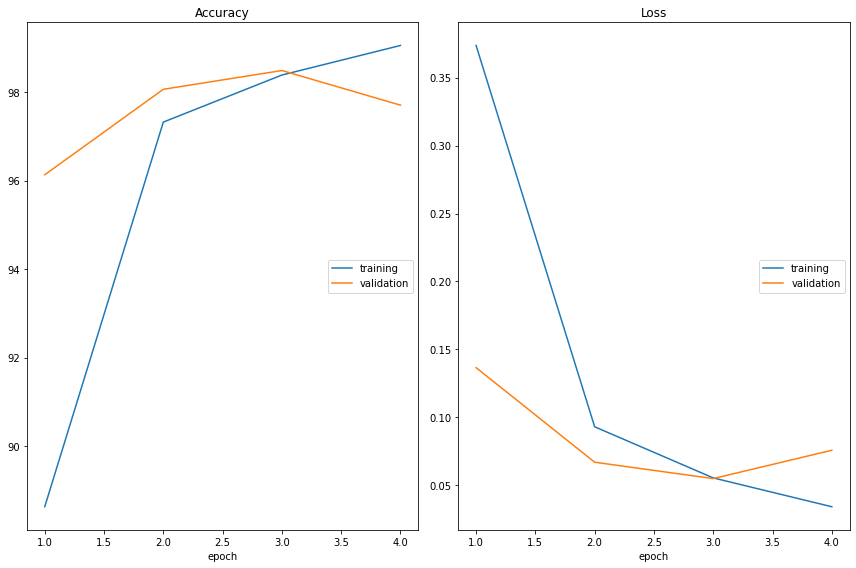

Accuracy
	training         	 (min:   88.625, max:   99.058, cur:   99.058)
	validation       	 (min:   96.133, max:   98.492, cur:   97.708)
Loss
	training         	 (min:    0.034, max:    0.374, cur:    0.034)
	validation       	 (min:    0.055, max:    0.137, cur:    0.076)
Test steps: 500 1.55s test_loss: 0.068739 test_acc: 97.790000                                 
Test:
	Loss:  0.069
	Accuracy:  97.790


In [ ]:
# Let the Fancy training loop start! 
# Make sure to Turn the GPU ON
fancy_poutyne_train('mnist3', mnist3)

Model starts to overfit around 2nd epoch! This can help us decide how many epochs to use for training to avoid overfitting.



### 8. Inference  
We have a trained model in our hands now.  
We would now like to write a simnple inference routine where we can enjoy  
the predictions of our PyTorch Model! 

In [ ]:
# A rather straightforward inference routine 

def inference():
    PATH = 'mnist3_last_epoch.ckpt' # Path to the saved model checkpoint

    model = MNISTModel1().to('cpu')
    model.load_state_dict(torch.load(PATH))
    summary(model, (1,28,28), device = 'cpu') 

    dataiter= iter(train_loader)
    images,labels = dataiter.next()
    label = labels[0] # ground truth

    image = images[0]
    #print(image.shape)
    image = torch.unsqueeze(image, dim =0)

    #make a forward pass
    with torch.no_grad():
      output=model.forward(image)
    
    # Our model outputs 'logits', we need to transform it into class probabilities. 
    # https://discuss.pytorch.org/t/how-to-extract-probabilities/2720/12
    # To transform logits, we need to use the 'Softmax' function
    # https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d
    # Therefore,  
    class_probabilities = F.softmax(output, dim=1).numpy().squeeze()
    print('\nClass Probabilities ==>', class_probabilities)
    for i, proba in enumerate(class_probabilities):
        print(f'Class \t{i}\t Probability \t{100*proba:.2f}%')

    # A very Fancy way to showcase the results 
    # Create a figure with two axes, ax1 and ax2
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2) # Subplot with 2 columns
    # ax1 holds the image from the test dataset
    ax1.imshow(image.resize_(1, 28, 28).numpy().squeeze())
    ax1.set_title('Ground Truth ' + str(label.numpy()))
    # ax2 holds a horizontal bar chart containing class_probabilities 
    ax2.barh(np.arange(10), class_probabilities)
    ax2.set_aspect(0.1) # aspect ratio of ax2, else it will get too big
    ax2.set_yticks(np.arange(10)) # 10 ticks on the y-axis for 10 classes
    ax2.set_yticklabels(np.arange(10)) # set the ticklabels from 0 to 9
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1) # probability can't be over 1, hence set limit to 1.1

    return None

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
            Conv2d-2           [-1, 16, 28, 28]           1,168
            Linear-3                  [-1, 256]       3,211,520
            Linear-4                   [-1, 64]          16,448
           Dropout-5                   [-1, 64]               0
            Linear-6                   [-1, 10]             650
Total params: 3,229,866
Trainable params: 3,229,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.15
Params size (MB): 12.32
Estimated Total Size (MB): 12.47
----------------------------------------------------------------

Class Probabilities ==> [2.20e-08 8.34e-12 7.65e-14 7.65e-14 8.84e-11 3.05e-09 1.00e+00 7.65e-14 7.88e-10 7.65e-14]
Class 	0	 Probability 	0.00%
Class 	1	 Probabil

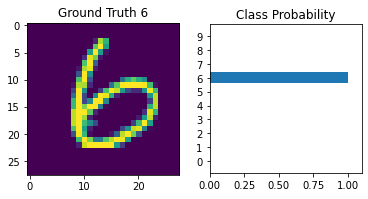

In [ ]:
inference() 

### 9.  Convolutional Neural Nets as Feature Extractor

In [ ]:
### Resnet was one of the architectures that became very famous in the popular ImageNet competition. We adopt it below

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# ResNet takes 3-channel (RGB) image,  while MNIST is grayscale single channel. Hence changing the input channel to 1.
model_ft.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# Here the size of each output sample is set to 10, instead of the binary as in resnet
model_ft.fc = nn.Linear(num_ftrs, 10)
model_ft = model_ft.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [ ]:
print("Second Last layer: ", model_ft.layer4[1]) #Output size 512
print("Last Layer:", model_ft.fc) #Output size 10

Second Last layer:  BasicBlock(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Last Layer: Linear(in_features=512, out_features=10, bias=True)


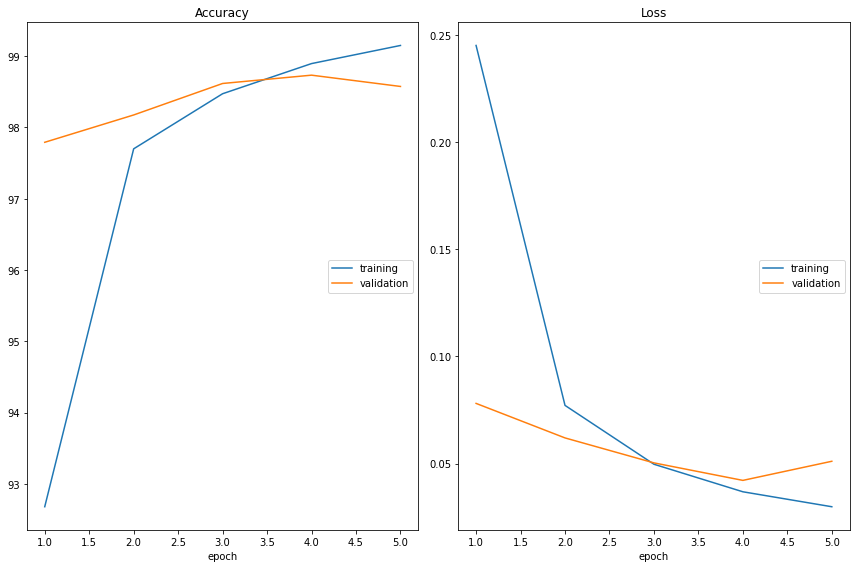

Accuracy
	training         	 (min:   92.679, max:   99.150, cur:   99.150)
	validation       	 (min:   97.792, max:   98.733, cur:   98.575)
Loss
	training         	 (min:    0.030, max:    0.245, cur:    0.030)
	validation       	 (min:    0.042, max:    0.078, cur:    0.051)
Test steps: 500 5.18s test_loss: 0.044693 test_acc: 98.750000                                  
Test:
	Loss:  0.045
	Accuracy:  98.750


In [ ]:
learning_rate = 0.01
epochs = 5
fancy_poutyne_train('mnist-tl',model_ft)

### Thank You!  


<br/>Note: Adpated from the master notebooks:

https://github.com/pranjalchaubey/Deep-Learning-Notes

https://pythonprogramming.net/training-deep-learning-neural-network-pytorch/

https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/62840b1eece760d5e42593187847261f/transfer_learning_tutorial.ipynb#scrollTo=7NfzhbCPmTqB


